In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))


Epoch 1/10
1875/1875 [==============================] - 59s 30ms/step - loss: 0.1410 - accuracy: 0.9563 - val_loss: 0.0433 - val_accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0386 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0257 - val_accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0264 - val_accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0313 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0314 -

In [9]:
model.save('hand_digit_cnn.model')


In [10]:
model = tf.keras.models.load_model('hand_digit_cnn.model')


In [11]:
loss, accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"loss = {loss} \naccuracy = {accuracy}")

313/313 [==============================] - 3s 11ms/step - loss: 0.0348 - accuracy: 0.9919
loss = 0.03480047360062599 
accuracy = 0.9919000267982483


In [12]:
image_index = 0  # Change this to the index of the image you want to predict
input_image = x_test[image_index]

In [13]:
input_image = input_image.reshape(1, 28, 28, 1)

# Make predictions
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 122ms/step


Predicted label: 7


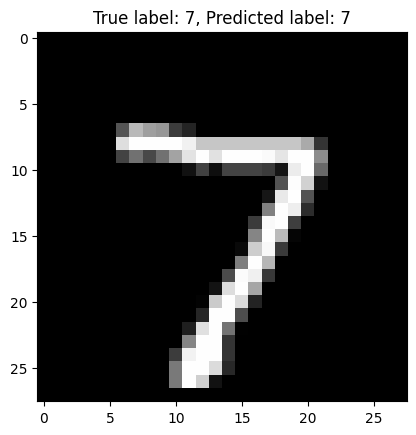

In [14]:
print(f"Predicted label: {predicted_label}")

# Display the image and its label
plt.imshow(x_test[image_index], cmap='gray')
plt.title(f"True label: {y_test[image_index]}, Predicted label: {predicted_label}")
plt.show()